In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf



In [2]:
start = '2013-01-01'
end = '2023-12-30'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2763,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2764,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2765,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
2766,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


In [6]:
ma_100_days = data.Close.rolling(100).mean()

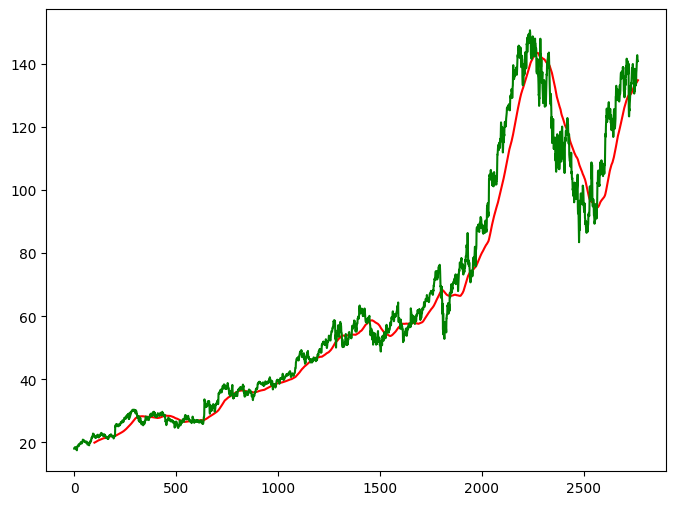

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

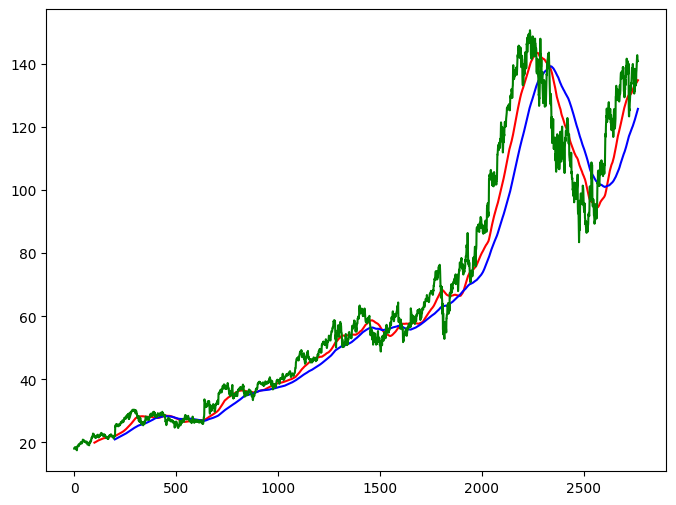

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2214

In [13]:
data_test.shape[0]

554

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale =scaler.fit_transform(data_train)

In [16]:
x = []
y = []


for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [21]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
67/67 [==============================] - 42s 502ms/step - loss: 0.0234
Epoch 2/50
67/67 [==============================] - 20s 305ms/step - loss: 0.0050
Epoch 3/50
67/67 [==============================] - 19s 286ms/step - loss: 0.0041
Epoch 4/50
67/67 [==============================] - 20s 303ms/step - loss: 0.0044
Epoch 5/50
67/67 [==============================] - 20s 299ms/step - loss: 0.0034
Epoch 6/50
67/67 [==============================] - 21s 312ms/step - loss: 0.0028
Epoch 7/50
67/67 [==============================] - 21s 306ms/step - loss: 0.0030
Epoch 8/50
67/67 [==============================] - 20s 296ms/step - loss: 0.0029
Epoch 9/50
67/67 [==============================] - 21s 308ms/step - loss: 0.0026
Epoch 10/50
67/67 [==============================] - 19s 290ms/step - loss: 0.0029
Epoch 11/50
67/67 [==============================] - 21s 309ms/step - loss: 0.0028
Epoch 12/50
67/67 [==============================] - 20s 302ms/step - loss: 0.0026
Epoch 13/50
6

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [25]:
data_test_scale = scaler.fit_transform(data_test)

In [26]:
x = []
y = []


for i in range(100, data_test_scale.shape[0]):
   x.append(data_test_scale[i-100:i])
   y.append(data_test_scale[i,0])

In [27]:
x, y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 83ms/step


In [29]:
scale = 1/scaler.scale_

In [30]:
y_predict = y_predict*scale

In [31]:
y = y*scale

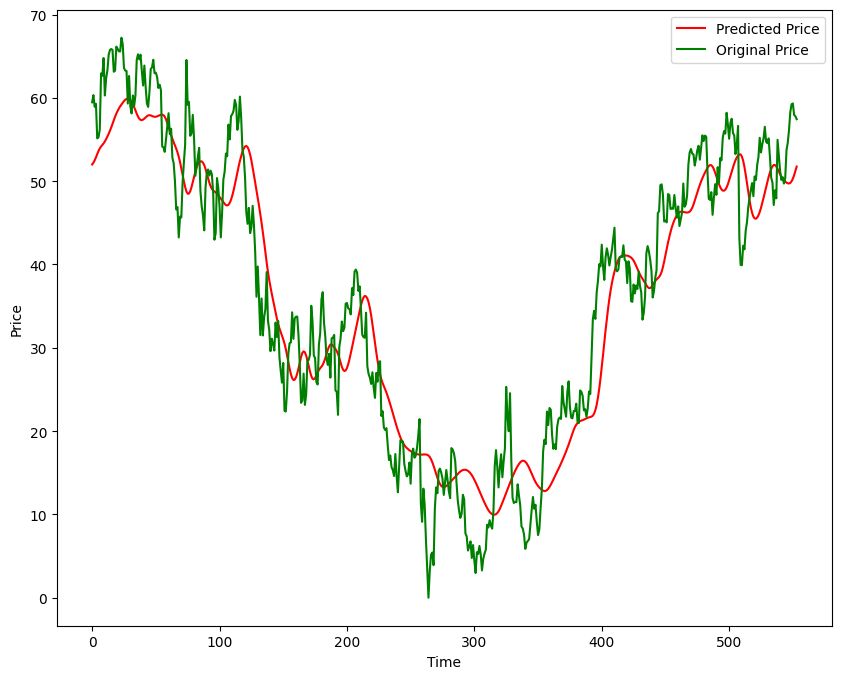

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y,'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
model.save('stock Prediction Model.Keras')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [35]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')




Mounted at /content/drive
